In [1]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00:00:0100:01


In [1]:
import torch
import random, glob
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Train model

In [4]:
model = YOLO('yolov8s.pt')
model.train(data='/kaggle/input/firesmoke/data.yaml', epochs=50, batch=32, imgsz=640, device=device, name='yolov8_bs32_e50_ims640')

100%|██████████| 21.5M/21.5M [00:00<00:00, 111MB/s]


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/firesmoke/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_bs32_e50_ims640, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False,

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 7.4±6.6 MB/s, size: 36.4 KB)


train: Scanning /kaggle/input/firesmoke/train/labels... 7260 images, 40 backgrounds, 0 corrupt: 100%|██████████| 7260/7260 [00:27<00:00, 264.76it/s]

train: /kaggle/input/firesmoke/train/images/0111_jpg.rf.5749c708008580c3362f5eeb23701976.jpg: 1 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_102_jpg.rf.5afe475856f363fa1fb75ca2c0f392da.jpg: 1 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_1049_jpg.rf.a8a07ed70c26cef89626c5d0d5de28a9.jpg: 1 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_105_jpg.rf.3738844d08c29064b654a7416fe19187.jpg: 1 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_1060_jpg.rf.63d637dab1addeaf8cde03649978f6c6.jpg: 1 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_1092_jpg.rf.d65e5af3c99ce9872d61ef7063317bb6.jpg: 1 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_1143_jpg.rf.d0393b76572e10cc54c7ffc4813ea43a.jpg: 3 duplicate labels removed
train: /kaggle/input/firesmoke/train/images/Img_1150_jpg.rf.5b8804fdb5b34365e3ac22f6e55d88a6.jpg: 2 duplicate labels removed
train:

WARNING ⚠️ train: Cache directory /kaggle/input/firesmoke/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1107, len(boxes) = 11120. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.1±2.0 MB/s, size: 38.5 KB)


val: Scanning /kaggle/input/firesmoke/valid/labels... 1571 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1571/1571 [00:05<00:00, 264.55it/s]

val: /kaggle/input/firesmoke/valid/images/52_jpg.rf.ac932dd6cb0eaf0719a8434d64816651.jpg: 1 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1039_jpg.rf.b81be94954f9f5d6bc1941a31a5f6f9e.jpg: 1 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1166_jpg.rf.aa4e7d34e47f4eb89736a837240c5ed2.jpg: 4 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1169_jpg.rf.5fd62273fe193aa479d253353634beda.jpg: 2 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1188_jpg.rf.26138a456c1ed4e5471c401f6033c02b.jpg: 2 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1208_jpg.rf.6b327a4fc9488903596a89fa868cd9fc.jpg: 1 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1223_jpg.rf.442858fe6ee955354f42ae84da01496d.jpg: 1 duplicate labels removed
val: /kaggle/input/firesmoke/valid/images/Img_1914_jpg.rf.4c999eccf76360c6bd39fb7f88e8ee6b.jpg: 1 duplicate labels removed
val: /kaggle/input/fir

Plotting labels to runs/detect/yolov8_bs32_e50_ims640/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_bs32_e50_ims640
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.63G      1.785       2.21      1.663         69        640: 100%|██████████| 227/227 [02:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.87it/s]


                   all       1571       2569      0.374      0.323      0.279      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.67G      1.825      1.878      1.692         73        640: 100%|██████████| 227/227 [02:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.491      0.353      0.373      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.67G      1.776      1.786      1.669         81        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]


                   all       1571       2569      0.478      0.429      0.393      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.67G      1.757      1.717      1.641         69        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]


                   all       1571       2569      0.556      0.412      0.423      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.67G      1.708      1.662       1.62         65        640: 100%|██████████| 227/227 [02:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]


                   all       1571       2569      0.643      0.512      0.547      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.67G      1.651      1.533      1.558         66        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.636      0.523      0.557      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       7.7G      1.624      1.479      1.548         76        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.649      0.507      0.546      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       7.7G      1.579       1.43      1.523         60        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       1571       2569       0.62      0.586      0.587      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       7.7G       1.57      1.385      1.519         84        640: 100%|██████████| 227/227 [02:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       1571       2569      0.695      0.551        0.6      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       7.7G      1.543      1.356       1.49         77        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       1571       2569      0.665      0.563      0.592      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.74G      1.525      1.318      1.473         60        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]

                   all       1571       2569      0.734      0.595      0.641       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.74G      1.492      1.282      1.451         65        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       1571       2569      0.685      0.629       0.66      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.74G      1.496      1.272      1.465         74        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.723      0.615      0.642       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.74G      1.469      1.222      1.446         52        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.729      0.607      0.665      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.74G      1.449      1.195      1.422         82        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.748      0.603      0.661      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.78G      1.445      1.184      1.424         91        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       1571       2569      0.742      0.622      0.673      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.78G      1.419      1.169       1.41         75        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.736      0.643      0.676      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.78G      1.414      1.138      1.398         93        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       1571       2569      0.773      0.595      0.676      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.78G      1.405      1.138      1.403         76        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       1571       2569      0.714       0.64      0.685      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.78G      1.399      1.117       1.39         53        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       1571       2569      0.729      0.667      0.698      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.78G      1.377      1.096      1.376         59        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.768      0.663      0.712      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.81G      1.376      1.072      1.368         82        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]

                   all       1571       2569      0.777      0.641      0.705       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.81G      1.347      1.047      1.362         90        640: 100%|██████████| 227/227 [02:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.757      0.651      0.707      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.81G       1.35      1.048      1.363         86        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.788      0.652      0.708      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.81G      1.329      1.009      1.351         63        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.784      0.648      0.712      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.81G      1.321      1.011      1.339         83        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       1571       2569      0.776      0.661      0.719      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.81G      1.324      1.005      1.342         79        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.779      0.668       0.72      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.81G      1.301     0.9808      1.329         83        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.765      0.668       0.72      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.81G      1.301     0.9777       1.33         88        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       1571       2569      0.764      0.678      0.722      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.81G      1.269     0.9545       1.31         75        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569       0.79      0.635      0.719      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.81G      1.264      0.955      1.306         74        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       1571       2569      0.761      0.692      0.741      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.81G      1.248     0.9364      1.297         78        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       1571       2569      0.769       0.67      0.724       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.81G      1.246     0.9174      1.296         80        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.736      0.688      0.721       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.81G      1.235     0.9128      1.292         67        640: 100%|██████████| 227/227 [02:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.761      0.687      0.732      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.81G      1.214     0.8888      1.276         91        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569       0.77      0.693      0.734      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.81G      1.221     0.8929      1.279         63        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.782      0.699      0.738      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.81G      1.212     0.8908      1.275         72        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.792       0.68      0.737      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.81G      1.201      0.868      1.264         87        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.763      0.693      0.737      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.81G      1.195     0.8589      1.263         84        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.08it/s]

                   all       1571       2569      0.766      0.688      0.745      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.81G      1.177     0.8421      1.246         88        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.766      0.689      0.746      0.454


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.81G      1.193     0.7644      1.274         43        640: 100%|██████████| 227/227 [02:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.744      0.699      0.747      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.81G      1.156     0.7208       1.25         57        640: 100%|██████████| 227/227 [02:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       1571       2569      0.809      0.671      0.748       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.81G      1.136     0.7117      1.242         45        640: 100%|██████████| 227/227 [02:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       1571       2569      0.785      0.684       0.75      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.81G      1.132     0.6973      1.231         46        640: 100%|██████████| 227/227 [02:02<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       1571       2569      0.792      0.681      0.756      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.81G      1.114     0.6785      1.223         42        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       1571       2569      0.797      0.687      0.753      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.81G      1.095     0.6695      1.209         39        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]

                   all       1571       2569      0.795      0.682      0.752      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.81G      1.076     0.6488      1.199         42        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       1571       2569      0.787      0.698      0.758      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.81G      1.072     0.6509      1.195         40        640: 100%|██████████| 227/227 [02:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       1571       2569      0.811      0.684       0.76      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.81G      1.058     0.6338       1.19         48        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       1571       2569      0.803      0.684      0.755      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.81G      1.042     0.6271      1.184         41        640: 100%|██████████| 227/227 [02:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       1571       2569      0.814       0.68      0.753      0.472



50 epochs completed in 1.874 hours.
Optimizer stripped from runs/detect/yolov8_bs32_e50_ims640/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8_bs32_e50_ims640/weights/best.pt, 22.5MB

Validating runs/detect/yolov8_bs32_e50_ims640/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1571       2569      0.812      0.684       0.76      0.477
                  Fire       1440       2133      0.882      0.808      0.865      0.542
                 Smoke        308        436      0.742      0.561      0.655      0.413
Speed: 0.1ms preprocess, 4.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov8_bs32_e50_ims640


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79666c2d8450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [5]:
!zip -r /kaggle/working/output.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/results.png (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/confusion_matrix.png (deflated 30%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/val_batch1_labels.jpg (deflated 13%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/BoxP_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/val_batch1_pred.jpg (deflated 12%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/weights/best.pt (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8_bs32_e50_ims640/val_batch0_

## Predict

In [3]:
imgs = glob.glob('../data/fire/test/images/*.jpg')

sample = random.sample(imgs, min(len(imgs), 4))

model = YOLO("runs/detect/yolov8_bs32_e50_ims640/weights/best.pt")

results = model.predict(
    source=sample,
    imgsz=640,
    conf=0.3,
    iou=0.5,
    device=device,
    stream=False,
    save=False
)


0: 640x640 1 Fire, 1 Smoke, 22.9ms
1: 640x640 1 Fire, 22.9ms
2: 640x640 1 Fire, 1 Smoke, 22.9ms
3: 640x640 1 Fire, 22.9ms
Speed: 4.4ms preprocess, 22.9ms inference, 44.6ms postprocess per image at shape (1, 3, 640, 640)


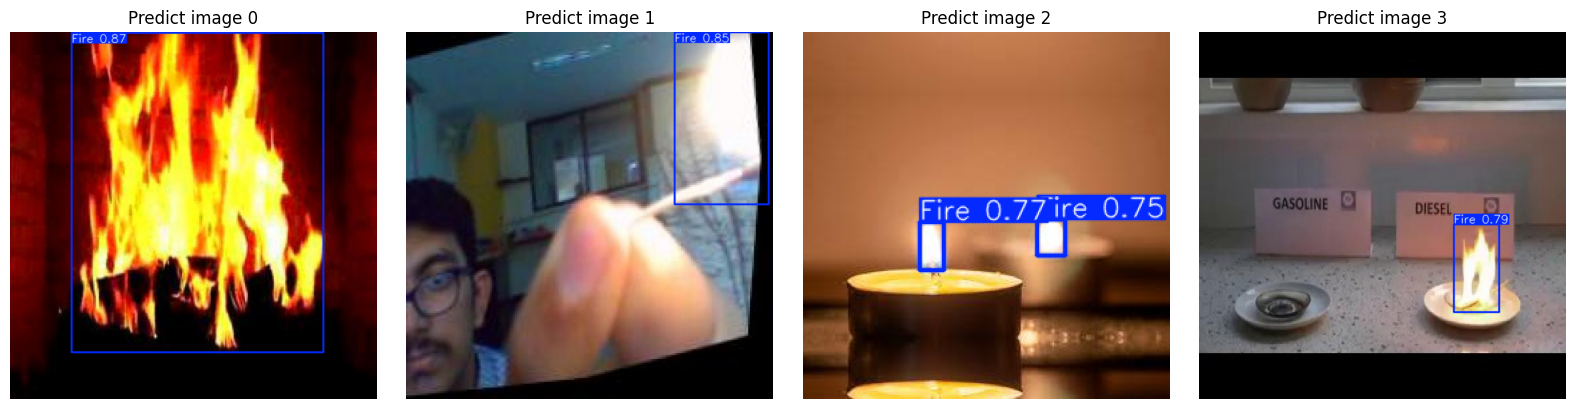

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(4*4, 1*4))

for i, r in enumerate(results):
    img = r.plot()
    ax = axes[i]
    ax.imshow(img[:,:,::-1])
    ax.axis('off')
    ax.set_title(f'Predict image {i}')

plt.tight_layout()
plt.show()

In [25]:
# Tìm box có conf cao nhất
sample = random.sample(imgs, 100)
results = model.predict(
    source=sample,
    imgsz=640,
    conf=0.3,
    iou=0.5,
    device=device,
    stream=False,
    save=False
)
all_confs = [box.conf.item() for r in results for box in r.boxes]

print(f'Max confidence: {max(all_confs)}')


0: 640x640 1 Fire, 182.8ms
1: 640x640 2 Smokes, 182.8ms
2: 640x640 3 Fires, 3 Smokes, 182.8ms
3: 640x640 1 Fire, 182.8ms
4: 640x640 1 Fire, 182.8ms
5: 640x640 1 Fire, 182.8ms
6: 640x640 2 Fires, 182.8ms
7: 640x640 3 Fires, 182.8ms
8: 640x640 1 Fire, 182.8ms
9: 640x640 3 Fires, 182.8ms
10: 640x640 1 Smoke, 182.8ms
11: 640x640 1 Fire, 182.8ms
12: 640x640 1 Fire, 2 Smokes, 182.8ms
13: 640x640 1 Fire, 182.8ms
14: 640x640 1 Fire, 182.8ms
15: 640x640 1 Fire, 182.8ms
16: 640x640 1 Fire, 182.8ms
17: 640x640 1 Fire, 182.8ms
18: 640x640 1 Fire, 182.8ms
19: 640x640 1 Fire, 182.8ms
20: 640x640 1 Smoke, 182.8ms
21: 640x640 1 Smoke, 182.8ms
22: 640x640 3 Fires, 1 Smoke, 182.8ms
23: 640x640 1 Fire, 182.8ms
24: 640x640 1 Fire, 182.8ms
25: 640x640 1 Fire, 182.8ms
26: 640x640 1 Fire, 182.8ms
27: 640x640 1 Fire, 1 Smoke, 182.8ms
28: 640x640 1 Smoke, 182.8ms
29: 640x640 1 Fire, 182.8ms
30: 640x640 1 Fire, 182.8ms
31: 640x640 1 Fire, 182.8ms
32: 640x640 2 Fires, 182.8ms
33: 640x640 1 Fire, 1 Smoke, 182.8m